In [1]:
load ('C:\Users\aniez\Desktop\ee4c03\DataSet_OFDM\DataSet\DataSet1.mat')

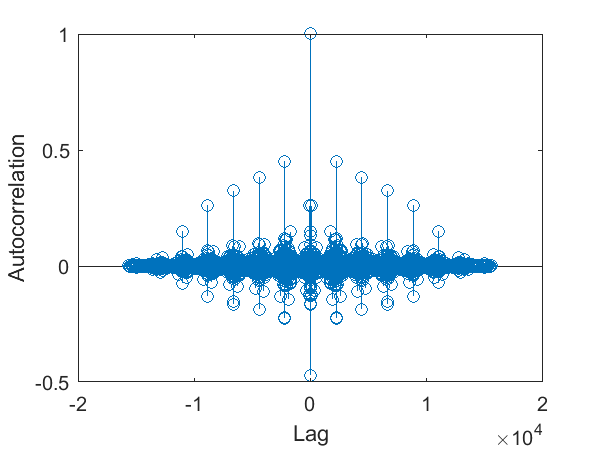

In [269]:
% autocorrelation plot of received signal

f = figure;  
f.Position = [50 50 400 300]; 
[c,lags] = xcorr(LowNoise_RxSignal,'normalized');
stem(lags,c);
xlabel('Lag');
ylabel('Autocorrelation');

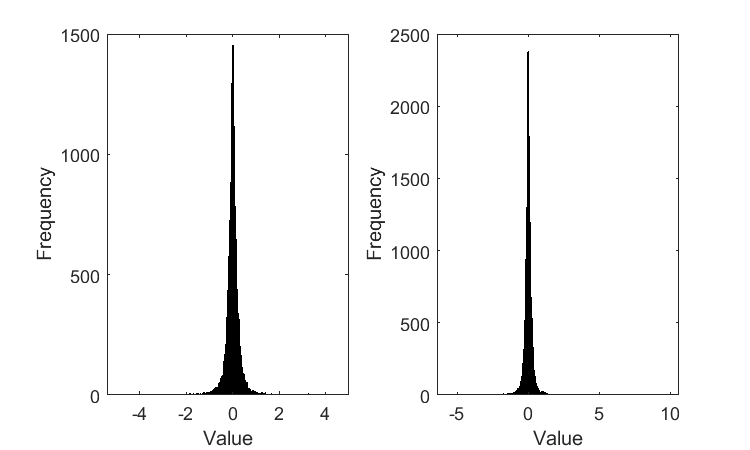

In [122]:
%histogram of received signal

num_bins = 300; 

f = figure;  
f.Position = [50 50 500 300]; 
subplot(1, 2, 1);
hist1 = histogram(imag(NoNoise_RxSignal), num_bins);
xlabel('Value'); % Label for the x-axis
ylabel('Frequency'); % Label for the y-axis
%title('Histogram of Imaginary');

subplot(1, 2, 2);
hist2 = histogram(real(NoNoise_RxSignal), num_bins);
xlabel('Value'); % Label for the x-axis
ylabel('Frequency'); % Label for the y-axis
%title('Histogram of Real');

In [3]:
% removal of cyclic prefix
symbol_length = 2208; %fft_length+CP_length
CP_length = 160;   %channel_length - 1

Rx_withoutCP = [];
numIntervals = 7;  %total number of blocks

% Loop through the blocks and symbol length
for i = 1:numIntervals
    startIndex = (i - 1) * symbol_length + 1;
    endIndex = startIndex + symbol_length - 1;

    %remove CP in each block
    Rx_withoutCP = [Rx_withoutCP, NoNoise_RxSignal(startIndex + CP_length:endIndex)];

Rx_withoutCP_resh = reshape(Rx_withoutCP, [], 1);

end

In [4]:
size(Rx_withoutCP)
size(Rx_withoutCP_resh)

ans = 1x2 double
        2048           7

ans = 1x2 double
       14336           1

In [173]:
pilot_indices = OFDM.PilotIndices;

%fft of the recieved signal without CP with size 2048 x 7
Rx_withoutCP_fft = fft(Rx_withoutCP);

%Extraction of pilot in every block
indices_to_extract = pilot_indices;
pilot_data = Rx_withoutCP_fft(indices_to_extract, : );
data_indices = OFDM.DataIndices;

%Extraction of pilot in every block
indices_to_extract2 = data_indices;
data_symbols = Rx_withoutCP_fft(indices_to_extract2, : );
y = reshape(pilot_data, [], 1);

value = OFDM.PilotSymbol;  
transmitted_pilot = value * ones(200, 7);

In [123]:
fs = OFDM.SamplingFreq; 
N = 2048; % Number of subcarriers

% Calculate the OFDM symbol duration
T_symbol = (N + 160) / fs

T_symbol = 7.1875e-05

In [8]:
% Calculate correlation of channel gain
f_D = 50; % Maximum Doppler frequency shift

% Compute the correlation of the channel gain
d = besselj(0, 2 * pi * f_D * T_symbol)

d = 0.9999

In [282]:
% Kalman Filtering

num_frames = 7; 
pilot_symbols = transmitted_pilot;
received_symbols = pilot_data;

% Kalman Filter parameters
A = [0.9999]; % State transition matrix
Q = 00009999; %Process noise covariance
R = 0; % Measurement noise covariance
x0 = 0; % Initial state estimation
P0 = 0.9999; % Initial error covariance

% Initialization
x = x0; % Initial state estimation
P = P0; % Initial error covariance
estimated_channel = zeros(200, num_frames); % Initialize the estimated channel

z = (pilot_symbols) ; % Using received pilot data as the measurement
H = (received_symbols); % Observation matrix 

% Kalman Filter estimation
for i = 1:num_frames
    for j = 1:200
        % Prediction
        x_pred = A * x ;
        P_pred = A ^2 * P + Q^2;
        

        % Kalman Gain
        K = (P_pred * H(j,i)) / ((H(j,i)' * P_pred * H(j,i)) + R);

        % Update
        x = x_pred + (K * (z(j,i) - (H(j,i)' * x_pred)));
        P = (1 - K * H(j,i)') * P_pred;

        estimated_channel(:, i) = x;
    end
end

% Display the estimated channel
%disp('Estimated Channel:');
%disp(estimated_channel);


In [284]:
% Data decoding using channel estimates
channel_data = zeros(1000,7);
channel_data(:,1) = estimated_channel(1,1);
channel_data(:,2) = estimated_channel(1,2);
channel_data(:,3) = estimated_channel(1,3);
channel_data(:,4) = estimated_channel(1,4);
channel_data(:,5) = estimated_channel(1,5);
channel_data(:,6) = estimated_channel(1,6);
channel_data(:,7) = estimated_channel(1,7);
detected_data = data_symbols ./ channel_data;


ans = 1x2 double
        1000           7

ans = 1x2 double
        7000           1

ans = 1x2 double
        6050           1

ans = 1x2 double
       12100           1

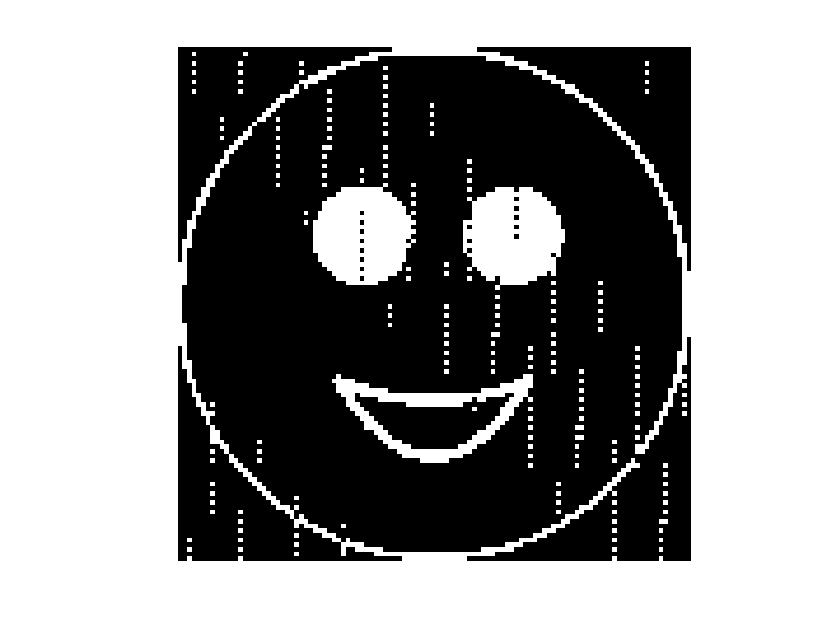

In [285]:
% Decoding the image

size(detected_data)
b = detected_data(:);
size(b)
b_final = b(1:6050);
size(b_final)
detected_bit = qamdemod(b_final, 4, 'OutputType', 'bit');
size(detected_bit)
DecodeImage = cast(255*reshape(detected_bit,ImageSize),'uint8');
imshow(DecodeImage);

In [200]:
% removal of cyclic prefix

symbol_length = 2208; %fft_length+CP_length
CP_length = 160;   %channel_length - 1

Rx_withoutCP2 = [];
numIntervals = 7;  %total number of blocks

% Loop through the blocks and symbol length
for i = 1:numIntervals
    startIndex = (i - 1) * symbol_length + 1;
    endIndex = startIndex + symbol_length - 1;

    %remove CP in each block
    Rx_withoutCP2 = [Rx_withoutCP2, LowNoise_RxSignal(startIndex + CP_length:endIndex)];

Rx_withoutCP_resh2 = reshape(Rx_withoutCP2, [], 1);

end

In [201]:
pilot_indices = OFDM.PilotIndices;

%fft of the recieved signal without CP with size 2048 x 7
Rx_withoutCP_fft2 = fft(Rx_withoutCP2);

%Extraction of pilot in every block
indices_to_extract = pilot_indices;
pilot_data2 = Rx_withoutCP_fft2(indices_to_extract, : );

%Extraction of data symbol in every block
data_indices = OFDM.DataIndices;
indices_to_extract2 = data_indices;
data_symbols2 = Rx_withoutCP_fft2(indices_to_extract2, : );

y = reshape(pilot_data2, [], 1);
value = OFDM.PilotSymbol;  
transmitted_pilot2 = value * ones(200, 7);

In [289]:
% Kalman Filtering

num_frames = 7; % Number of frames
pilot_symbols2 = transmitted_pilot2; 
received_symbols2 = pilot_data2;

% Kalman Filter parameters
A = [0.9999]; % State transition matrix
Q = [00009999]; %Process noise covariance
R2 = 10.^(-25/10); % Measurement noise covariance
x0 = 0; % Initial state estimation
P0 = 0.9999; % Initial error covariance

% Initialization
x = x0; % Initial state estimation
P = P0; % Initial error covariance
estimated_channel2 = zeros(200, num_frames); %Initialize the estimated channel

z = (pilot_symbols2) ; % Using received pilot data as the measurement
H = (received_symbols2); % Observation matrix

% Kalman Filter estimation
for i = 1:num_frames
    for j = 1:200
        % Prediction
        x_pred = A * x ;
        P_pred = A ^2 * P  + Q^2;
        

        % Kalman Gain
        K = (P_pred * H(j,i)) / ((H(j,i)' * P_pred * H(j,i)) + R2);

        % Update
        x = x_pred + (K * (z(j,i) - (H(j,i)' * x_pred)));
        P = (1 - K * H(j,i)') * P_pred;

        estimated_channel2(:, i) = x;
    end
end

% Display the estimated channel
%disp('Estimated Channel2:');
%disp(estimated_channel2);


In [290]:
% Data decoding using channel estimates

channel_data2 = zeros(1000,7);
channel_data2(:,1) = estimated_channel2(1,1);
channel_data2(:,2) = estimated_channel2(1,2);
channel_data2(:,3) = estimated_channel2(1,3);
channel_data2(:,4) = estimated_channel2(1,4);
channel_data2(:,5) = estimated_channel2(1,5);
channel_data2(:,6) = estimated_channel2(1,6);
channel_data2(:,7) = estimated_channel2(1,7);
detected_data2 = data_symbols2 ./ channel_data2;


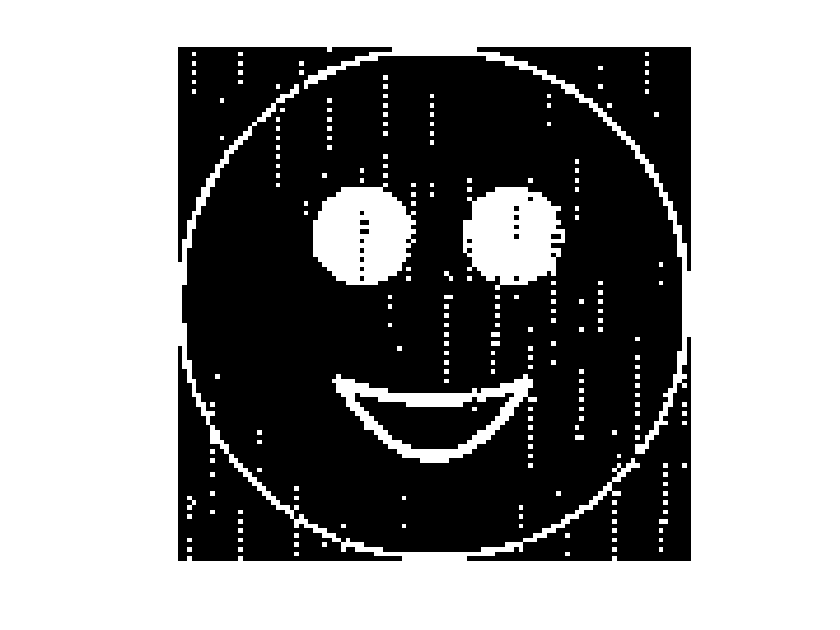

In [291]:
% Decoding the image

b2 = detected_data2(:);
b_final2 = b2(1:6050);
detected_bits2 = qamdemod(b_final2, 4, 'OutputType', 'bit');
size(detected_bits2);
DecodeImage = cast(255*reshape(detected_bits2,ImageSize),'uint8');
imshow(DecodeImage);

In [207]:
% removal of cyclic prefix
symbol_length = 2208; %fft_length+CP_length
CP_length = 160;   %channel_length - 1

Rx_withoutCP3 = [];
numIntervals = 7;  %total number of blocks

% Loop through the blocks and symbol length
for i = 1:numIntervals
    startIndex = (i - 1) * symbol_length + 1;
    endIndex = startIndex + symbol_length - 1;

    %remove CP in each block
    Rx_withoutCP3 = [Rx_withoutCP3, HighNoise_RxSignal(startIndex + CP_length:endIndex)];

Rx_withoutCP_resh3 = reshape(Rx_withoutCP3, [], 1);

end

In [208]:
pilot_indices = OFDM.PilotIndices;
%fft of the recieved signal without CP with size 2048 x 7
Rx_withoutCP_fft3 = fft(Rx_withoutCP3);

%Extraction of pilot in every block
indices_to_extract = pilot_indices;
pilot_data3 = Rx_withoutCP_fft3(indices_to_extract, : );
data_indices = OFDM.DataIndices;

%Extraction of data symbols in every block
indices_to_extract3 = data_indices;
data_symbols3 = Rx_withoutCP_fft3(indices_to_extract2, : );

y = reshape(pilot_data3, [], 1);
value = OFDM.PilotSymbol;  
transmitted_pilot3 = value * ones(200, 7);

In [302]:
%Kalman Filtering

num_frames = 7; % Number of frames
pilot_symbols3 = transmitted_pilot3; % Assuming 200 pilot values and 7 frames
received_symbols3 = pilot_data3;

% Kalman Filter parameters
A = [0.9999]; % State transition matrix
Q = 00009999; %Process noise covariance
R3 = 10.^(-10/10); % Measurement noise covariance
x0 = 0; % Initial state estimation
P0 = 0.9999; % Initial error covariance

% Initialization
x = x0; % Initial state estimation
P = P0; % Initial error covariance
estimated_channel3 = zeros(200, num_frames); % Initialize the estimated channel

z = (pilot_symbols3) ; % Using received pilot data as the measurement
H = (received_symbols3); % Observation matrix 

% Kalman Filter estimation
for i = 1:num_frames
    for j = 1:200
        % Prediction
        x_pred = A * x ;
        P_pred = A ^ 2 * P  + Q^2;

        

        % Kalman Gain
        K = (P_pred * H(j,i)) / ((H(j,i)' * P_pred * H(j,i)) + R3);

        % Update
        x = x_pred + (K * (z(j,i) - (H(j,i)' * x_pred)));
        P = (1 - K * H(j,i)') * P_pred;

        estimated_channel3(:, i) = x;
    end
end

% Display the estimated channel
%disp('Estimated Channel3:');
%disp(estimated_channel3);


In [303]:
% Data decoding using channel estimates

channel_data3 = zeros(1000,7);
channel_data3(:,1) = estimated_channel3(1,1);
channel_data3(:,2) = estimated_channel3(1,2);
channel_data3(:,3) = estimated_channel3(1,3);
channel_data3(:,4) = estimated_channel3(1,4);
channel_data3(:,5) = estimated_channel3(1,5);
channel_data3(:,6) = estimated_channel3(1,6);
channel_data3(:,7) = estimated_channel3(1,7);
detected_data3 = data_symbols3 ./ channel_data3;



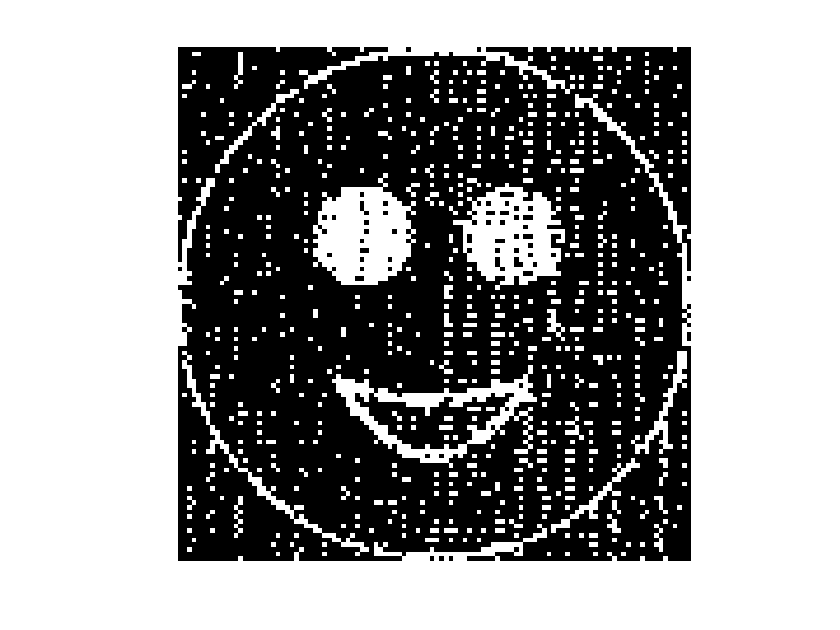

In [304]:
%Image decoding

b3 = detected_data3(:);
b_final3 = b3(1:6050);
detected_bits3 = qamdemod(b_final3, 4, 'OutputType', 'bit');
size(detected_bits3);
DecodeImage3 = cast(255*reshape(detected_bits3,ImageSize),'uint8');
imshow(DecodeImage3);

## BER PLOT

In [305]:
%BER calculation

ber_no = 0;
ber_low = sum(detected_bit ~= detected_bits2) / length(detected_bit);
ber_high = sum(detected_bit ~= detected_bits3) / length(detected_bit);

In [306]:
% Plot results

noise_variances = [0, 10.^(-25/10), 10.^(-10/10)];
ber_values = [ber_no, ber_low, ber_high];

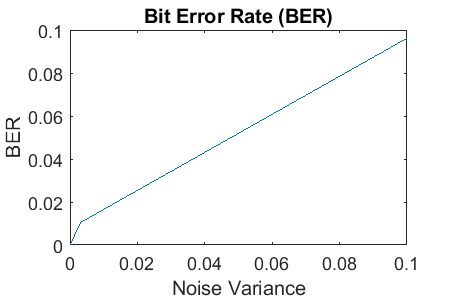

In [307]:
figure;

f = figure;  
f.Position = [50 50 300 200]; 
plot(noise_variances, ber_values);
title('Bit Error Rate (BER)');
xlabel('Noise Variance');
ylabel('BER');
 